### TRABALHO INTERDISCIPLINAR PO + LP + IHC


# Import de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Import do arquivo

Nota: foi necessário fazer mudanças no arquivo diretamente no excel. Os valores estavam no padrão brasileiro com os decimais separados por virgula. **Nenhum valor foi alterado**. O arquivo está em anexo no .rar do trabalho

In [ ]:
df = pd.read_csv('/content/Transferência de Impostos a Municípios.xls.csv', sep = ";")

df

,Nome do Município,Valor ICMS,Valor IPI,Valor IPVA,Valor Total
0,ABADIA DOS DOURADOS,1452690.53,17663.11,610136.37,2080490.01
1,ABAETE,2894859.82,35305.34,2241314.30,5171479.46
2,ABRE CAMPO,1192123.98,14527.50,1271073.90,2477725.38
3,ACAIACA,689248.36,8396.40,213703.66,911348.42
4,ACUCENA,1038712.97,12631.57,348132.34,1399476.88
...,...,...,...,...,...
848,VIRGINOPOLIS,1195896.57,14512.36,797974.88,2008383.81
849,VIRGOLANDIA,665968.41,8094.63,162416.99,836480.03
850,VISCONDE DO RIO BRANCO,6117181.78,74091.41,4251253.65,10442526.84
851,VOLTA GRANDE,1355715.43,16495.04,278975.64,1651186.11


## Correlação de Variáveis



In [ ]:
defArray = lambda df, nomeVar : np.array(df[nomeVar])

preenche_array = lambda valor1 : np.array([np.ones(np.size(valor1)), valor1])

calc_correl = lambda valor1, valor2 : np.dot(np.linalg.inv(np.dot(preenche_array(valor1), np.transpose(preenche_array(valor1)))), np.dot(preenche_array(valor1),np.transpose(valor2)))

In [ ]:
res = 1
while res != 0:   
  nome_variavel1 = input("Entre com o nome da primeira variável: ")
  nome_variavel2 = input("Entre com o nome da segunda variável: ")

  valor1 = defArray(df, nome_variavel1)
  valor2 = defArray(df, nome_variavel2)
  resultado = calc_correl(valor1, valor2)

  print()
  print("A correlação entre as variaveis {} e {} é de {}, {}".format(nome_variavel1, nome_variavel2, resultado[0], resultado[1]))
  print()

  res = int(input("Deseja realizar outra operação? (qualquer tecla para 1 - SIM | 0 - SAIR): "))

Entre com o nome da primeira variável: Valor IPVA
Entre com o nome da segunda variável: Valor Total

A correlação entre as variaveis Valor IPVA e Valor Total é de 2988332.5315967486, 1.5641502512050411

Deseja realizar outra operação? (qualquer tecla para - SIM | 0 - SAIR): 1
Entre com o nome da primeira variável: Valor ICMS
Entre com o nome da segunda variável: Valor IPI

A correlação entre as variaveis Valor ICMS e Valor IPI é de 13.015162586541326, 0.012176204683392146

Deseja realizar outra operação? (qualquer tecla para - SIM | 0 - SAIR): 0


## REGRESSÃO LINEAR


Entre com o nome da primeira variável: Valor IPVA
Entre com o nome da segunda variável: Valor Total


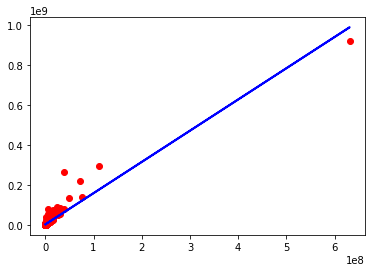

In [ ]:
nome_variavel1 = input("Entre com o nome da primeira variável: ")
nome_variavel2 = input("Entre com o nome da segunda variável: ")

valor1 = defArray(df, nome_variavel1)
valor2 = defArray(df, nome_variavel2)
valorM = np.array([valor1])
val = valorM.T

regre = linear_model.LinearRegression()
regre.fit(val, valor2)
y_est = regre.predict(val)

plt.scatter(val, valor2, color='red')
plt.plot(val, y_est, color='blue', linewidth=2) 
plt.show()